In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('merge_bit_nlp_pca.csv')
df.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
1676    1676
1677    1677
1678    1678
1679    1679
1680    1680
Name: Unnamed: 0, Length: 1681, dtype: int64

In [3]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,30,31,32,33,34]]
X1 = df.iloc[:,20:30]
y = df.iloc[:,-1:]

In [4]:
X.head()

,Open1,Open2,Open3,Open4,Open5,Low1,Low2,Low3,Low4,Low5,...,Vol_1,Vol_2,Vol_3,Vol_4,Vol_5,Close1,Close2,Close3,Close4,Close5
0,14112.200195,13625.000000,14978.200195,15270.700195,15477.200195,13154.700195,13163.599609,14844.500000,14522.200195,15202.799805,...,10291200000,16846600192,16871900160,21783199744,23840899072,13657.200195,14982.099609,15201.000000,15599.200195,17429.500000
1,13625.000000,14978.200195,15270.700195,15477.200195,17462.099609,13163.599609,14844.500000,14522.200195,15202.799805,16764.599609,...,16846600192,16871900160,21783199744,23840899072,18314600448,14982.099609,15201.000000,15599.200195,17429.500000,17527.000000
2,14978.200195,15270.700195,15477.200195,17462.099609,17527.300781,14844.500000,14522.200195,15202.799805,16764.599609,16087.700195,...,16871900160,21783199744,23840899072,18314600448,15866000384,15201.000000,15599.200195,17429.500000,17527.000000,16477.599609
3,15270.700195,15477.200195,17462.099609,17527.300781,16476.199219,14522.200195,15202.799805,16764.599609,16087.700195,14208.200195,...,21783199744,23840899072,18314600448,15866000384,18413899776,15599.200195,17429.500000,17527.000000,16477.599609,15170.099609
4,15477.200195,17462.099609,17527.300781,16476.199219,15123.700195,15202.799805,16764.599609,16087.700195,14208.200195,14424.000000,...,23840899072,18314600448,15866000384,18413899776,16659999744,17429.500000,17527.000000,16477.599609,15170.099609,14595.400391


In [5]:
X1.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Neg1,Neg2,Neg3,Neg4,Neg5
0,0.145734,0.279138,0.213051,0.201034,0.227316,0.854266,0.720862,0.786949,0.798966,0.772684
1,0.279138,0.213051,0.201034,0.227316,0.224865,0.720862,0.786949,0.798966,0.772684,0.775135
2,0.213051,0.201034,0.227316,0.224865,0.212849,0.786949,0.798966,0.772684,0.775135,0.787151
3,0.201034,0.227316,0.224865,0.212849,0.174523,0.798966,0.772684,0.775135,0.787151,0.825477
4,0.227316,0.224865,0.212849,0.174523,0.268976,0.772684,0.775135,0.787151,0.825477,0.731024


In [6]:
y

,Close
0,17527.000000
1,16477.599609
2,15170.099609
3,14595.400391
4,14973.299805
...,...
1676,23164.318359
1677,23947.642578
1678,23957.529297
1679,24402.818359


In [7]:
#Normalising the data
Norm = MinMaxScaler() 
X = Norm.fit_transform(X)
y = Norm.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
X_train

array([[0.89758784, 0.93321152, 0.92835202, ..., 0.90494961, 0.89987338,
        0.90611936],
       [0.11970513, 0.11231474, 0.1134944 , ..., 0.10896032, 0.1169485 ,
        0.11590156],
       [0.67185001, 0.6746369 , 0.65784178, ..., 0.62132652, 0.62594504,
        0.60703967],
       ...,
       [0.40050302, 0.40644961, 0.44925485, ..., 0.4592761 , 0.44668308,
        0.47809166],
       [0.05154824, 0.05416713, 0.05470652, ..., 0.05394831, 0.05670565,
        0.05999556],
       [0.21640321, 0.21576602, 0.22519952, ..., 0.23225101, 0.25476539,
        0.24197451]])

Feature 0: 59423.055143
Feature 1: 72887.180807
Feature 2: 93731.041408
Feature 3: 126873.942205
Feature 4: 184658.108486
Feature 5: 65893.578670
Feature 6: 82169.369624
Feature 7: 106894.337863
Feature 8: 142562.477323
Feature 9: 241989.673501
Feature 10: 66484.203047
Feature 11: 83708.677875
Feature 12: 110599.740143
Feature 13: 158052.900095
Feature 14: 254405.885735
Feature 15: 728.828992
Feature 16: 574.036421
Feature 17: 561.609105
Feature 18: 550.536929
Feature 19: 553.446816
Feature 20: 73000.960830
Feature 21: 93602.341308
Feature 22: 127103.032382
Feature 23: 185370.428805
Feature 24: 369356.625186


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


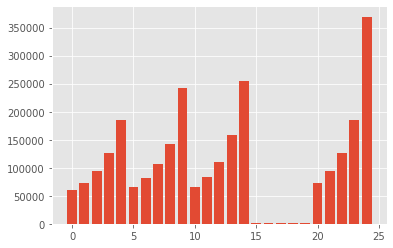

In [11]:
#SelectKBest Implementation
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [12]:
#Applying PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [13]:
#Getting the variance ratio
print(pca.explained_variance_ratio_)

[0.98976311 0.00542263]


In [14]:
#covariance matrix
np.cov(X_new.T)

array([[1.51004499e+00, 1.48029737e-17],
       [1.48029737e-17, 8.27310099e-03]])

In [15]:
#finding the variaance/eigen values
pca.explained_variance_

array([1.51004499, 0.0082731 ])

In [16]:
#Feature Importance
print(abs( pca.components_ ))

[[2.23254654e-01 2.23554657e-01 2.23697168e-01 2.23698102e-01
  2.23552270e-01 2.20477542e-01 2.20672133e-01 2.20711005e-01
  2.20603989e-01 2.20342385e-01 2.25059972e-01 2.25287159e-01
  2.25373414e-01 2.25316307e-01 2.25111913e-01 2.69271971e-02
  2.69303260e-02 2.69423560e-02 2.69620817e-02 2.69812088e-02
  2.23437829e-01 2.23580379e-01 2.23580787e-01 2.23434119e-01
  2.23136214e-01]
 [2.61690226e-04 6.92499176e-03 1.18492499e-02 1.48084419e-02
  1.49021288e-02 3.68787164e-02 4.22855788e-02 4.61548742e-02
  4.79392589e-02 4.49802613e-02 1.83614122e-02 1.30256501e-02
  8.83338293e-03 7.53453031e-03 6.37039635e-03 4.41404363e-01
  4.47816795e-01 4.45797928e-01 4.47238052e-01 4.40698214e-01
  6.66410460e-03 1.16062611e-02 1.45956011e-02 1.46735338e-02
  1.14238764e-02]]


In [17]:
# Dropping the features with less importance
df_1 = df.drop(['Low1','Low2','Low4','Low5','Vol_1','Vol_2','Vol_3','Vol_4','Vol_5'] ,axis = 1)


In [18]:
df_1.head()

,Open1,Open2,Open3,Open4,Open5,Low3,High1,High2,High3,High4,...,Neg2,Neg3,Neg4,Neg5,Close1,Close2,Close3,Close4,Close5,Close
0,14112.200195,13625.000000,14978.200195,15270.700195,15477.200195,14844.500000,14112.200195,15444.599609,15572.799805,15739.700195,...,0.720862,0.786949,0.798966,0.772684,13657.200195,14982.099609,15201.000000,15599.200195,17429.500000,17527.000000
1,13625.000000,14978.200195,15270.700195,15477.200195,17462.099609,14522.200195,15444.599609,15572.799805,15739.700195,17705.199219,...,0.786949,0.798966,0.772684,0.775135,14982.099609,15201.000000,15599.200195,17429.500000,17527.000000,16477.599609
2,14978.200195,15270.700195,15477.200195,17462.099609,17527.300781,15202.799805,15572.799805,15739.700195,17705.199219,17712.400391,...,0.798966,0.772684,0.775135,0.787151,15201.000000,15599.200195,17429.500000,17527.000000,16477.599609,15170.099609
3,15270.700195,15477.200195,17462.099609,17527.300781,16476.199219,16764.599609,15739.700195,17705.199219,17712.400391,17579.599609,...,0.772684,0.775135,0.787151,0.825477,15599.200195,17429.500000,17527.000000,16477.599609,15170.099609,14595.400391
4,15477.200195,17462.099609,17527.300781,16476.199219,15123.700195,16087.700195,17705.199219,17712.400391,17579.599609,16537.900391,...,0.775135,0.787151,0.825477,0.731024,17429.500000,17527.000000,16477.599609,15170.099609,14595.400391,14973.299805


In [19]:
X = df_1.iloc[:,0:27]
y = df_1.iloc[:,-1:]

In [20]:
X

,Open1,Open2,Open3,Open4,Open5,Low3,High1,High2,High3,High4,...,Neg2,Neg3,Neg4,Neg5,Close1,Close2,Close3,Close4,Close5,Close
0,14112.200195,13625.000000,14978.200195,15270.700195,15477.200195,14844.500000,14112.200195,15444.599609,15572.799805,15739.700195,...,0.720862,0.786949,0.798966,0.772684,13657.200195,14982.099609,15201.000000,15599.200195,17429.500000,17527.000000
1,13625.000000,14978.200195,15270.700195,15477.200195,17462.099609,14522.200195,15444.599609,15572.799805,15739.700195,17705.199219,...,0.786949,0.798966,0.772684,0.775135,14982.099609,15201.000000,15599.200195,17429.500000,17527.000000,16477.599609
2,14978.200195,15270.700195,15477.200195,17462.099609,17527.300781,15202.799805,15572.799805,15739.700195,17705.199219,17712.400391,...,0.798966,0.772684,0.775135,0.787151,15201.000000,15599.200195,17429.500000,17527.000000,16477.599609,15170.099609
3,15270.700195,15477.200195,17462.099609,17527.300781,16476.199219,16764.599609,15739.700195,17705.199219,17712.400391,17579.599609,...,0.772684,0.775135,0.787151,0.825477,15599.200195,17429.500000,17527.000000,16477.599609,15170.099609,14595.400391
4,15477.200195,17462.099609,17527.300781,16476.199219,15123.700195,16087.700195,17705.199219,17712.400391,17579.599609,16537.900391,...,0.775135,0.787151,0.825477,0.731024,17429.500000,17527.000000,16477.599609,15170.099609,14595.400391,14973.299805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,22848.214844,22626.833984,23291.423828,22963.505859,23179.527344,22961.279297,23198.009766,23422.828125,23326.562500,23359.009766,...,0.784617,0.804687,0.807814,0.813886,22630.957031,23289.314453,22961.279297,23175.890625,23809.486328,23164.318359
1677,22626.833984,23291.423828,22963.505859,23179.527344,23811.484375,22894.556641,23422.828125,23326.562500,23359.009766,24203.689453,...,0.804687,0.807814,0.813886,0.822940,23289.314453,22961.279297,23175.890625,23809.486328,23164.318359,23947.642578
1678,23291.423828,22963.505859,23179.527344,23811.484375,23162.898438,23176.546875,23326.562500,23359.009766,24203.689453,23898.615234,...,0.807814,0.813886,0.822940,0.844327,22961.279297,23175.890625,23809.486328,23164.318359,23947.642578,23957.529297
1679,22963.505859,23179.527344,23811.484375,23162.898438,23948.345703,22982.000000,23359.009766,24203.689453,23898.615234,24127.414062,...,0.813886,0.822940,0.844327,0.813480,23175.890625,23809.486328,23164.318359,23947.642578,23957.529297,24402.818359


In [21]:
#Normalising the new dataset
from sklearn.preprocessing import MinMaxScaler
Norm = MinMaxScaler() 
X_df_N = Norm.fit_transform(X)
y_df_N = Norm.fit_transform(y)


In [22]:
#Splitting the dataset into training, testing and validation Data
q_80 = int(len(X_df_N) * .8)
q_90 = int(len(X_df_N) * .9)

X_train1, y_train1 =  X_df_N[:q_80], y_df_N[:q_80]

X_val1, y_val1 = X_df_N[q_80:q_90], y_df_N[q_80:q_90]
X_test1, y_test1 = X_df_N[q_90:], y_df_N[q_90:]

In [23]:
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()

model1.add(LSTM(150, input_shape=(27,1), activation='relu',return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(300, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(200, activation='relu'))
model1.add(Dropout(0.6))
model1.add(Dense(1, activation='relu'))  


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 27, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 27, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 300)               541200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 200)               60200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [24]:
#Model compilation
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [25]:
#Model fitting
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=300)

Epoch 1/300
42/42 [==============================] - 6s 99ms/step - loss: 0.0589 - root_mean_squared_error: 0.2427 - val_loss: 0.1313 - val_root_mean_squared_error: 0.3624
Epoch 2/300
42/42 [==============================] - 4s 91ms/step - loss: 0.0283 - root_mean_squared_error: 0.1681 - val_loss: 0.0615 - val_root_mean_squared_error: 0.2481
Epoch 3/300
42/42 [==============================] - 4s 89ms/step - loss: 0.0089 - root_mean_squared_error: 0.0946 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0962
Epoch 4/300
42/42 [==============================] - 4s 91ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 5/300
42/42 [==============================] - 4s 96ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0846
Epoch 6/300
42/42 [==============================] - 4s 90ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0046 - val_

In [26]:
train_predictions = model1.predict(X_train1).flatten()

In [27]:
t_p=train_predictions.tolist()

In [28]:
y_train = y_train1.tolist()

In [29]:
#converting y_train to a list
flat_list = []
for sublist in y_train:
    for item in sublist:
        flat_list.append(item)


In [30]:
train_results = pd.DataFrame(data={'Train Predictions':t_p, 'Actuals':flat_list})

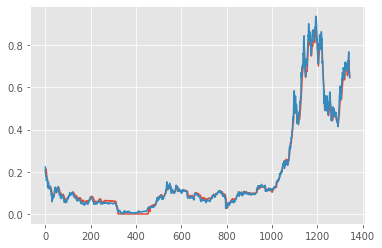

In [31]:
#Plotting the training result
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [32]:
val_predictions = model1.predict(X_val1).flatten()

In [33]:
v_p=val_predictions.tolist()

In [34]:
y_val = y_val1.tolist()

In [35]:
#Converting y_val to a list
flat_list_v = []
for sublist in y_val:
    for item in sublist:
        flat_list_v.append(item)

In [36]:
val_results = pd.DataFrame(data={'Val Predictions':v_p, 'Actuals':flat_list_v})

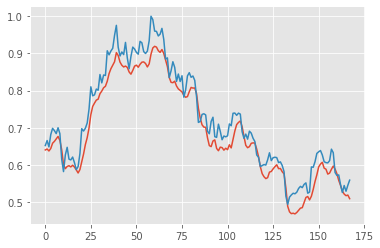

In [37]:
#plotting the validation results
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [38]:
test_predictions = model1.predict(X_test1).flatten()

In [39]:
test_p=test_predictions.tolist()

In [40]:
y_test = y_test1.tolist()

In [41]:
#plotting the y_test results
flat_list_t = []
for sublist in y_test:
    for item in sublist:
        flat_list_t.append(item)

In [42]:
test_results = pd.DataFrame(data={'Test Predictions':test_p, 'Actuals':flat_list_t})

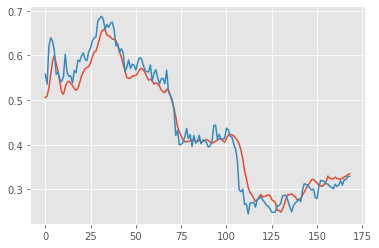

In [43]:
#plotting the test results
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [44]:
#Printing the MSE
print('Mean Squared Error:', metrics.mean_squared_error(test_p, flat_list_t))

Mean Squared Error: 0.0008272335315601727
